

# Profile of Ford GoBike Rentals at Busiest Start Stations
### by Phyllis La Monica


## Investigation Overview

<p>This investigation looks at 2018 rental data with a specific focus on the origination point of rentals.
</p>
<p>My primary interest was to look at the characteristics of rentals at the 5 busiest start_stations. A preliminary look at the data suggested younger male subscribers would be the majority of renters. Information on the rental characteristics explored in this investigation, gender, user type, age and rental day, could be put to use by GoBike system administrators and marketers.





## Dataset Overview

<p>The Ford GoBike System is a regional bike sharing system for the public. It covers the greater San Francisco Bay area in California. 
    
 A master dataset, created by merging 12 months of data, was refined to include rental information for only the 5 busiest start stations. This data was further refined to include only renters from age 14 to 80. This step eliminated outliers, necessary as the original age range of 0 to 130 clearly included non-living renters. 
 </p>
<p> Four characteristics were investigated: gender, user type, age and rental day. The resulting dataframe includes information on 168,373 rentals. A further breakdown of the rental characteristics:</p>

- Males outnumber the two gender groups, female and other, by 3 to 1.
- Subscribers outnumber customers by 8 to 1.
- Ages include 14 to 80.
- Rental days included Monday(0) through Sunday(6).

In [2]:
# Code for slide presentation follows

In [3]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


<a id='steps'></a>
    
### Wrangling Readiness Steps:  Create a master dataframe for Ford_GoBike 2018 data

1. Load each monthly Ford_GoBike dataset for 2018 into a pandas dataframe.
2. Use pandas concat() function to combine the individual monthly dataframes into one master dataframe for all of 2018 data.

#### Ref: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

#### Starting point: Load the January dataset into a pandas dataframe.

In [4]:
# Load the January dataset into a pandas dataframe.
#df_jan = pd.read_csv('/Users/pphallen/Desktop/project4data/201801-fordgobike-tripdata.csv')
df_jan = pd.read_csv('/Users/pphallen/Desktop/project4data/201801-fordgobike-tripdata.csv')
df_jan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
duration_sec               94802 non-null int64
start_time                 94802 non-null object
end_time                   94802 non-null object
start_station_id           94802 non-null int64
start_station_name         94802 non-null object
start_station_latitude     94802 non-null float64
start_station_longitude    94802 non-null float64
end_station_id             94802 non-null int64
end_station_name           94802 non-null object
end_station_latitude       94802 non-null float64
end_station_longitude      94802 non-null float64
bike_id                    94802 non-null int64
user_type                  94802 non-null object
member_birth_year          86963 non-null float64
member_gender              87001 non-null object
bike_share_for_all_trip    94802 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 11.6+ MB


#### Load February through December datasets.

In [5]:
df_feb = pd.read_csv('/Users/pphallen/Desktop/project4data/201802-fordgobike-tripdata.csv')
#df_feb.info() # Confirm columns match those in df_jan dataframe and collapse output

print('Column headings match with df_jan dataframe is confirmed.')
print('Shape: ', df_feb.shape)
df_feb.head(1)

Column headings match with df_jan dataframe is confirmed.
Shape:  (106718, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.40257,1035,Subscriber,1988.0,Male,No


In [6]:
df_mar = pd.read_csv('/Users/pphallen/Desktop/project4data/201803-fordgobike-tripdata.csv')
#df_mar.info() # Confirm columns match those in df_jan dataframe and collapse output

print('Column headings match with df_jan dataframe is confirmed.')
print('Shape: ', df_mar.shape)
df_mar.head(1)

Column headings match with df_jan dataframe is confirmed.
Shape:  (111382, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,71766,2018-03-31 16:58:33.1490,2018-04-01 12:54:39.2630,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,6,The Embarcadero at Sansome St,37.80477,-122.403234,341,Customer,1964.0,Female,No


In [7]:
df_apr = pd.read_csv('/Users/pphallen/Desktop/project4data/201804-fordgobike-tripdata.csv')
#df_apr.info() # Confirm columns match those in df_jan dataframe and collapse output

print('Column headings match with df_jan dataframe is confirmed.')
print('Shape: ', df_apr.shape)
df_apr.head(1)

Column headings match with df_jan dataframe is confirmed.
Shape:  (131169, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,72393,2018-04-30 22:49:32.6180,2018-05-01 18:56:06.3010,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,3940,Customer,NaN,NaN,No


In [8]:
df_may = pd.read_csv('/Users/pphallen/Desktop/project4data/201805-fordgobike-tripdata.csv')
#df_may.info() # Confirm columns match those in df_jan dataframe and collapse output

print('Column headings match with df_jan dataframe is confirmed.')
print('Shape: ', df_may.shape)
df_may.head(1)

Column headings match with df_jan dataframe is confirmed.
Shape:  (179125, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,56791,2018-05-31 21:41:51.4750,2018-06-01 13:28:22.7220,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,78,Folsom St at 9th St,37.773717,-122.411647,1230,Customer,NaN,NaN,No


In [9]:
df_june = pd.read_csv('/Users/pphallen/Desktop/project4data/201806-fordgobike-tripdata.csv')
#df_june.info() # Confirm columns match those in df_jan dataframe and collapse output

print('Column headings match with df_jan dataframe is confirmed.')
print('Shape: ', df_june.shape)
df_june.head(1)

Column headings match with df_jan dataframe is confirmed.
Shape:  (195968, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,59088,2018-06-30 23:32:44.6590,2018-07-01 15:57:33.3160,76.0,McCoppin St at Valencia St,37.771662,-122.422423,95.0,Sanchez St at 15th St,37.766219,-122.43106,2100,Subscriber,1975.0,Male,Yes


In [10]:
df_july = pd.read_csv('/Users/pphallen/Desktop/project4data/201807-fordgobike-tripdata.csv')
#df_july.info() # Confirm columns match those in df_jan dataframe and collapse output

print('Column headings match with df_jan dataframe is confirmed.')
print('Shape: ', df_july.shape)
df_july.head(1)

Column headings match with df_jan dataframe is confirmed.
Shape:  (199222, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,59989,2018-07-31 18:20:32.7230,2018-08-01 11:00:22.1890,197.0,El Embarcadero at Grand Ave,37.808848,-122.24968,181.0,Grand Ave at Webster St,37.811377,-122.265192,1953,Customer,1995.0,Male,No


In [11]:
df_aug = pd.read_csv('/Users/pphallen/Desktop/project4data/201808-fordgobike-tripdata.csv')
#df_aug.info() # Confirm columns match those in df_jan dataframe and collapse output

print('Column headings match with df_jan dataframe is confirmed.')
print('Shape: ', df_aug.shape)
df_aug.head(1)

Column headings match with df_jan dataframe is confirmed.
Shape:  (192162, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,69465,2018-08-31 19:18:08.6130,2018-09-01 14:35:54.0640,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,813,Customer,NaN,NaN,No


In [12]:
df_sept = pd.read_csv('/Users/pphallen/Desktop/project4data/201809-fordgobike-tripdata.csv')
#df_sept.info() # Confirm columns match those in df_jan dataframe and collapse output

print('Column headings match with df_jan dataframe is confirmed.')
print('Shape: ', df_sept.shape)
df_sept.head(1)

Column headings match with df_jan dataframe is confirmed.
Shape:  (186217, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,76491,2018-09-30 18:37:01.7710,2018-10-01 15:51:53.5530,120.0,Mission Dolores Park,37.76142,-122.426435,26.0,1st St at Folsom St,37.78729,-122.39438,903,Customer,1998.0,Female,No


In [13]:
df_oct = pd.read_csv('/Users/pphallen/Desktop/project4data/201810-fordgobike-tripdata.csv')
#df_oct.info() # Confirm columns match those in df_jan dataframe and collapse output

print('Column headings match with df_jan dataframe is confirmed.')
print('Shape: ', df_oct.shape)
df_oct.head(1)

Column headings match with df_jan dataframe is confirmed.
Shape:  (201458, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80066,2018-10-31 20:49:03.1400,2018-11-01 19:03:30.0550,138.0,Jersey St at Church St,37.7509,-122.427411,147.0,29th St at Tiffany Ave,37.744067,-122.421472,3458,Customer,1987.0,Female,No


In [14]:
df_nov = pd.read_csv('/Users/pphallen/Desktop/project4data/201811-fordgobike-tripdata.csv')
#df_nov.info() # Confirm columns match those in df_jan dataframe and collapse output

print('Column headings match with df_jan dataframe is confirmed.')
print('Shape: ', df_nov.shape)
df_nov.head(1)

Column headings match with df_jan dataframe is confirmed.
Shape:  (134135, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,79489,2018-11-30 13:40:32.7690,2018-12-01 11:45:21.9720,NaN,NaN,37.42,-121.94,NaN,NaN,37.41,-121.94,4105,Customer,1982.0,Female,No


In [15]:
df_dec = pd.read_csv('/Users/pphallen/Desktop/project4data/201812-fordgobike-tripdata.csv')
#df_dec.info() # Confirm columns match those in df_jan dataframe and collapse output

print('Column headings match with df_jan dataframe is confirmed.')
print('Shape: ', df_dec.shape)
df_dec.head(1)

Column headings match with df_jan dataframe is confirmed.
Shape:  (131363, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,68529,2018-12-31 20:03:11.7350,2019-01-01 15:05:21.5580,217.0,27th St at MLK Jr Way,37.817015,-122.271761,217.0,27th St at MLK Jr Way,37.817015,-122.271761,3305,Customer,NaN,NaN,No


### Completed: All 2018 monthly datasets read in to dataframes.
### Next: Use concat() function, create master dataframe: df_master.

In [16]:
frames = [df_jan, df_feb, df_mar, df_apr, df_may, df_june, df_july, df_aug, df_sept, df_oct, df_nov, df_dec]

df_master = pd.concat(frames)

print('Shape: ', df_master.shape)
print( '' )
df_master.info()

Shape:  (1863721, 16)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131362
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 241.7+ MB


### Create copy of master dataframe: df.

In [17]:
# Create copy of master dataframe, print shape, compare with master
df = df_master.copy()
print('df shape: ', df.shape)
print('df dtypes: ', df.dtypes)

df shape:  (1863721, 16)
df dtypes:  duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


<a id='univariate'></a>
## Univariate Exploration


#### Preliminary Steps:
1. Drop unneeded columns for longitude, latitude, bike id
2. Create an 'age' column.
3. Convert date to datetime and create a 'dow' day-of-week column.
4. Create a column for duration in minutes, duration_min.
5. Create dataframes for the 5 busiest stations and the 5 least busiest stations.
6. Drop unneeded columns for longitude, latitude, bike id


<a id='prelim'></a>
### Prelim step 1: Drop unneeded columns for longitude, latitude, bike id

In [18]:

columns = ['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','bike_id']
df.drop(columns, axis=1, inplace=True)
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,285.0,Webster St at O'Farrell St,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,15.0,San Francisco Ferry Building (Harry Bridges Pl...,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,296.0,5th St at Virginia St,Customer,1996.0,Male,No


### Prelim step 2: Create an 'age' column. Use age instead of birth year to improve clarity.

In [19]:
# Use pandas apply method and lambda fct 

df['age'] = df.apply(lambda row: row.member_birth_year * (-1) + 2019 , axis=1)

# Confirm dtype
print('column: age dtype:',df.age.dtype)

df.head(3)

column: age dtype: float64


,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,285.0,Webster St at O'Farrell St,Subscriber,1986.0,Male,No,33.0
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,15.0,San Francisco Ferry Building (Harry Bridges Pl...,Customer,NaN,NaN,No,NaN
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,296.0,5th St at Virginia St,Customer,1996.0,Male,No,23.0


In [20]:
# Find any NaNs
print('df.age.isna().sum(): ',df.age.isna().sum() )
print('df.age.notna().sum(): ',df.age.notna().sum() )
df.age.dtype

df.age.isna().sum():  110718
df.age.notna().sum():  1753003


dtype('float64')

In [21]:
# Convert dtype to int after filling in NaNs
df['age'] = df['age'].fillna(0).astype(int)
df.age.dtype

dtype('int64')

### Prelim step 3: Convert date to datetime and create a 'day_started' showing day-of-week.

#### Use pandas: split start_time column. <br>Create cols: date_started, time_started.

In [22]:
# Create new columns then create day of week columns.

df['date_started'] = pd.to_datetime(df['start_time']).dt.date    
df['time_started'] = pd.to_datetime(df['start_time']).dt.time

df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,date_started,time_started
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,285.0,Webster St at O'Farrell St,Subscriber,1986.0,Male,No,33,2018-01-31,22:52:35.239000
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,15.0,San Francisco Ferry Building (Harry Bridges Pl...,Customer,NaN,NaN,No,0,2018-01-31,16:13:34.351000


In [23]:
# Create new column showing day of week (int) rental started
# https://stackoverflow.com/questions/46515267/pandas-get-day-of-week-from-date-type-column
# ref: pandas doc -- "Return the day of the week as an integer, where Monday is 0 and Sunday is 6."

df['day_started']= pd.to_datetime(df['date_started']).dt.dayofweek
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,date_started,time_started,day_started
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,285.0,Webster St at O'Farrell St,Subscriber,1986.0,Male,No,33,2018-01-31,22:52:35.239000,2
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,15.0,San Francisco Ferry Building (Harry Bridges Pl...,Customer,NaN,NaN,No,0,2018-01-31,16:13:34.351000,2


### Prelim step 4: Create a column for duration in minutes, duration_min.

In [24]:
# Use pandas apply method and lambda fct to convert seconds to minutes & create min col
df['duration_min'] = df.apply(lambda row: row.duration_sec / 60, axis=1)

print('column: duration_min dtype:',df.duration_min.dtype)
df.duration_min = df.duration_min.astype(int)
print('confirm duration_min convert dtype to int: ',df.duration_min.dtype)
df.head(2)  

column: duration_min dtype: float64
confirm duration_min convert dtype to int:  int64


,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,date_started,time_started,day_started,duration_min
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,285.0,Webster St at O'Farrell St,Subscriber,1986.0,Male,No,33,2018-01-31,22:52:35.239000,2,1254
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,15.0,San Francisco Ferry Building (Harry Bridges Pl...,Customer,NaN,NaN,No,0,2018-01-31,16:13:34.351000,2,1423


### Prelim step 5:  Create dataframes for 5 busiest and least busiest station ids

In [25]:
# Use pandas query to create dataframe for 5  busiest stations

# http://pandas-docs.github.io/pandas-docs-travis/user_guide/indexing.html#the-query-method
#Special use of the == operator with list objects

df_busy = df.query('start_station_id == ["30","15","81","58","67"]')
df_busy.head(3)
df_busy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179804 entries, 1 to 131350
Data columns (total 16 columns):
duration_sec               179804 non-null int64
start_time                 179804 non-null object
end_time                   179804 non-null object
start_station_id           179804 non-null float64
start_station_name         179804 non-null object
end_station_id             179804 non-null float64
end_station_name           179804 non-null object
user_type                  179804 non-null object
member_birth_year          168677 non-null float64
member_gender              168683 non-null object
bike_share_for_all_trip    179804 non-null object
age                        179804 non-null int64
date_started               179804 non-null object
time_started               179804 non-null object
day_started                179804 non-null int64
duration_min               179804 non-null int64
dtypes: float64(3), int64(4), object(9)
memory usage: 23.3+ MB


In [26]:
# Create age group for df_busy: df_age_busy
df_age_busy = df_busy.query(' 13 < age < 81')

print('Youngest user age: ',df_age_busy.age.min() )  
print('Oldest user age: ',df_age_busy.age.max() ) 
print('Mean user age: ',df_age_busy.age.mean() ) 

Youngest user age:  19
Oldest user age:  80
Mean user age:  36.57806774245277


### Slide presentation continues below

## Distribution of Gender Split by User Type
The vast majority of renters at the 5 busiest start station are clearly male subscribers. Given the 3 to 1 proportion of males to the other 2 genders, female and others, this is not difficult to understand. What is not clear is why there are so many more male GoBike renters, an explanation not to be found in the available data.

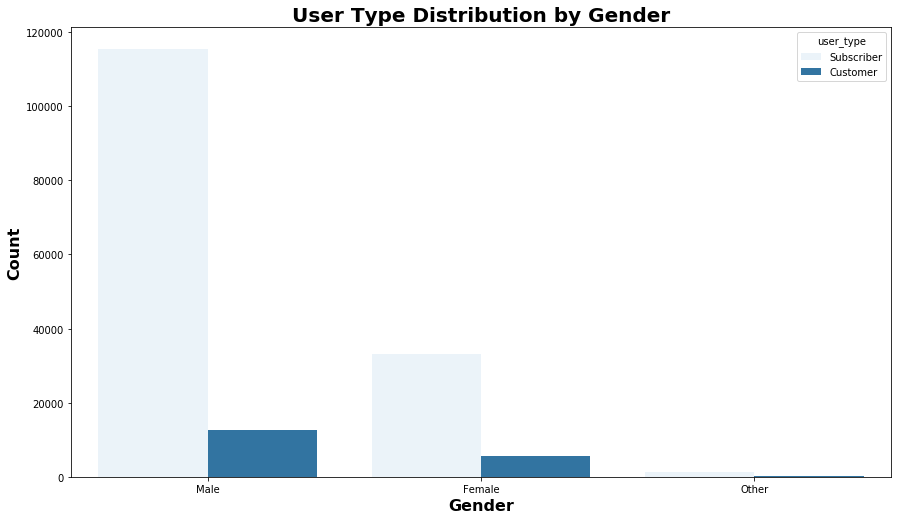

In [87]:
# Set plot dimension
plt.figure(figsize=[14.70, 8.27])

# Distribution: count by gender split by user type 
base_color = sb.color_palette()[0]
sb.countplot(x='member_gender',hue='user_type', data=df_age_busy, color=base_color).set_title('User Type Distribution by Gender', fontsize = 20, weight = 'semibold')
plt.xlabel('Gender', fontsize = 16, weight = 'semibold')
plt.ylabel('Count', fontsize = 16, weight = 'semibold');



## Gender and User Type by Day of Rental

Here we see high traffic weekday rentals by male customers, as well as female customers, while weekends get markedly less traffic. Male and female customers have similar medians at day 2 (Wednesday), and appear to have similar distributions, but it is noteworthy that the ratio of male to female renters is 3 to 1.  Also, the plot shows Mondays to be a somewhat lighter rental day for male subscribers even though it is the first day of the work week. For male customers the pattern is for lighter rental counts throughout the week. 

<br>The second visualization iterates the extremes in the distribution of gender counts over rental days. Both plots suggest that male subscribers use GoBikes for transport back and forth to work on the weekdays.

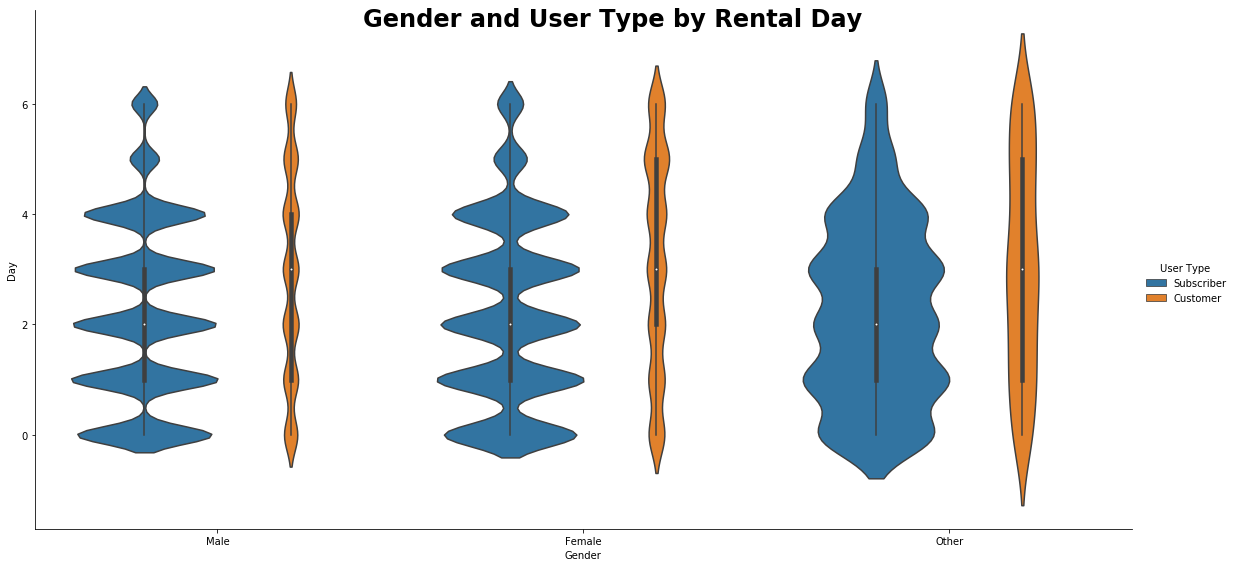

In [85]:
# Look at gender and user type on day of rental   

g = sb.catplot(data=df_age_busy, x='member_gender', y='day_started', hue='user_type', kind="violin", height=8, aspect=2, scale='count');

g._legend.set_title('User Type ')
g.set_axis_labels('Gender', 'Day')
g.fig.suptitle('Gender and User Type by Rental Day',  fontsize = 24, weight = 'semibold');

plt.show()
plt.close(1); # needed to avoid appearance of empty grid


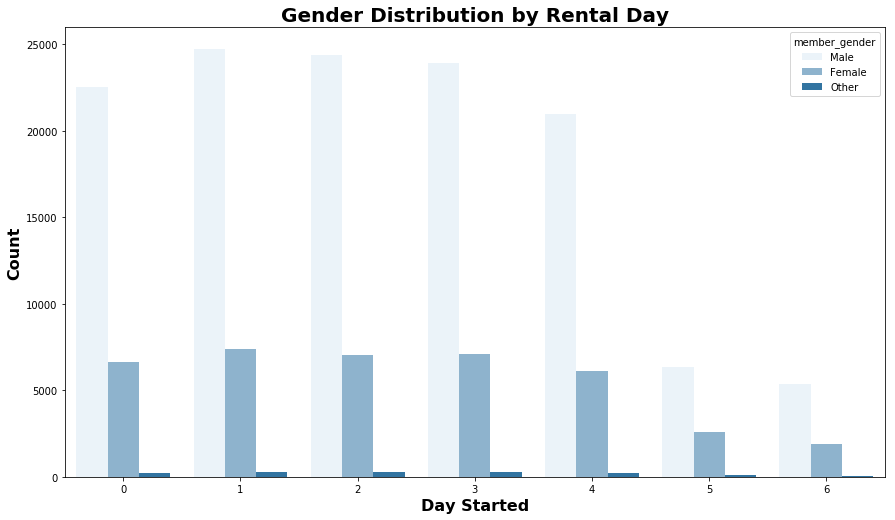

In [80]:
# Set plot dimension
plt.figure(figsize=[14.70, 8.27])

# Distribution: count by gender for rental day
base_color = sb.color_palette()[0]
sb.countplot(x='day_started',hue='member_gender', data=df_age_busy, color=base_color).set_title('Gender Distribution by Rental Day', fontsize = 20, weight = 'semibold')
plt.xlabel('Day Started', fontsize = 16, weight = 'semibold')
plt.ylabel('Count', fontsize = 16, weight = 'semibold');

## Interaction of Gender and User Type over Age

Ages of most male subscriber renters fall between 30 and 44 with a median age around 35. For male customer renters the bulk of the age range is lower, 28 to 37, as is the median at around 33. The plot clearly shows male subscribers have the widest range of ages within the top whisker than any other gender. 

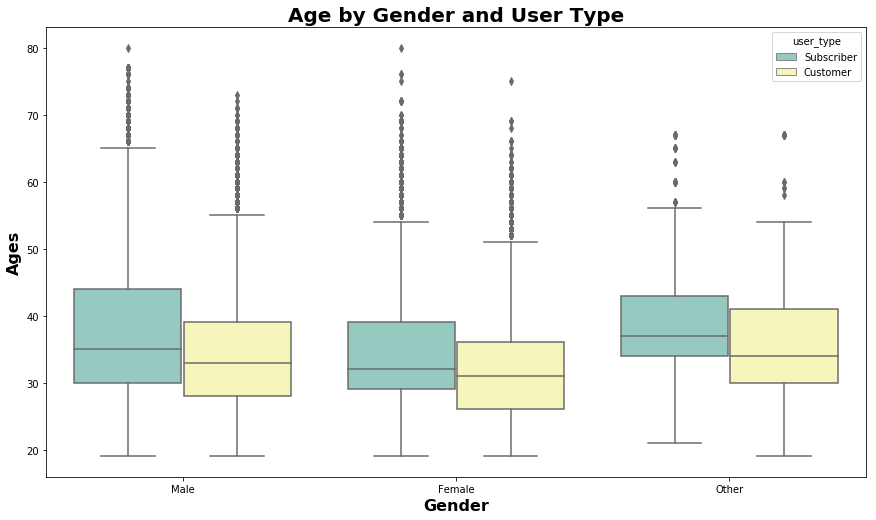

In [88]:
# Set plot dimension, comment out figsize
plt.figure(figsize=[14.70, 8.27]);

# Look at plots for categorical values and day_started for busiest stations
#fig, ax = plt.subplots(figsize = [14,6]);
sb.boxplot(data=df_age_busy, x='member_gender', y='age', hue='user_type', palette='Set3').set_title('Age by Gender and User Type',fontsize = 20, weight = 'semibold')
plt.ylabel('Ages', fontsize = 16, weight = 'semibold')
plt.xlabel('Gender', fontsize = 16, weight = 'semibold');


#### Program End

#### End of Slide Program
####  PROJECT 4: Communicate Data Findings: Slide Deck
- Programmer/Analyst: Phyllis La Monica
- Course: Udacity Data Analyst Nanodegree
- DAND Project #4: Communicate Data Findings
- Date Submitted: 19 June 2019, Revised 20 June 19